# 순환 신경망(Recurrent Neural Network, RNN)

- 루프(loop)를 가진 신경망의 한 종류

- 시퀀스의 원소를 순회하면서 지금까지 처리한 정보를 상태(state)에 저장

<img src="https://miro.medium.com/max/627/1*go8PHsPNbbV6qRiwpUQ5BQ.png">

<sub>출처: https://towardsdatascience.com/understanding-rnn-and-lstm-f7cdf6dfc14e</sub>

## 순환 신경망 레이어 (RNN Layer)

- 입력: `(timesteps, input_features)`

- 출력: `(timesteps, output_features)`

In [1]:
import numpy as np

In [3]:
timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features, ))

sucessive_outputs = []

for input_t in inputs:
  output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
  sucessive_outputs.append(output_t)
  state_t = output_t

final_output_sequence = np.stack(sucessive_outputs, axis=0)

## 케라스의 순환층
- `SimpleRNN` layer

- 입력: `(batch_size, timesteps, input_features)`

- 출력
  - `return_sequences`로 결정할 수 있음
  
  - 3D 텐서
    - 타임스텝의 출력을 모은 전체 시퀀스를 반환

    - `(batch_size, timesteps, output_features)`

  - 2D 텐서
    - 입력 시퀀스에 대한 마지막 출력만 반환

    - `(batch_size, output_features)`


In [8]:
from tensorflow.keras.layers import SimpleRNN, Embedding
from tensorflow.keras.models import Sequential

In [9]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [10]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


- 네트워크의 표현력을 증가시키기 위해 여러 개의 순환층을 차례대로 쌓는 것이 유용할 때가 있음

  - 이런 설정에서는 중간층들이 전체 출력 시퀀스를 반환하도록 설정

In [11]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


## IMDB 데이터 적용

### 데이터 로드

In [13]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

In [15]:
num_words = 10000
max_len = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=num_words)

print(len(input_train))
print(len(input_test))

input_train = sequence.pad_sequences(input_train, maxlen=max_len)
input_test = sequence.pad_sequences(input_test, maxlen=max_len)

print(input_train.shape)
print(input_test.shape)

25000
25000
(25000, 500)
(25000, 500)


### 모델 구성

In [16]:
from tensorflow.keras.layers import Dense

In [20]:
model = Sequential()

model.add(Embedding(num_words, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


### 모델 학습

In [21]:
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 71s 432ms/step - loss: 0.6389 - acc: 0.6171 - val_loss: 0.5454 - val_acc: 0.7396
Epoch 2/10
157/157 [==============================] - 65s 417ms/step - loss: 0.4048 - acc: 0.8256 - val_loss: 0.7796 - val_acc: 0.6744
Epoch 3/10
157/157 [==============================] - 67s 427ms/step - loss: 0.2878 - acc: 0.8878 - val_loss: 0.5472 - val_acc: 0.7858
Epoch 4/10
157/157 [==============================] - 65s 416ms/step - loss: 0.2117 - acc: 0.9198 - val_loss: 0.6668 - val_acc: 0.7866
Epoch 5/10
157/157 [==============================] - 65s 413ms/step - loss: 0.1565 - acc: 0.9435 - val_loss: 0.4046 - val_acc: 0.8458
Epoch 6/10
157/157 [==============================] - 72s 460ms/step - loss: 0.0997 - acc: 0.9668 - val_loss: 0.5220 - val_acc: 0.7838
Epoch 7/10
157/157 [==============================] - 90s 572ms/step - loss: 0.0592 - acc: 0.9821 - val_loss: 0.5314 - val_acc: 0.8120
Epoch 8/10
157/157 [==============================] - 8

### 시각화

In [22]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

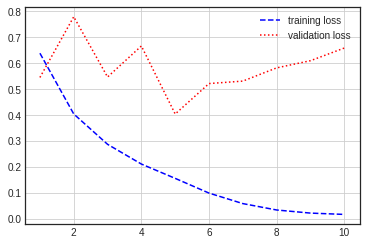

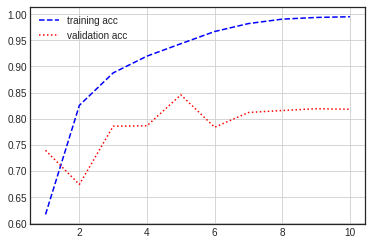

In [24]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b--', label='training loss')
plt.plot(epochs, val_loss, 'r:', label='validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label='training acc')
plt.plot(epochs, val_acc, 'r:', label='validation acc')
plt.grid()
plt.legend()
plt.show()

In [23]:
model.evaluate(input_test, y_test)

782/782 [==============================] - 28s 35ms/step - loss: 0.6546 - acc: 0.8132


[0.6545650959014893, 0.8131600022315979]

- 전체 시퀀스가 아니라 순서대로 500개의 단어만 입력했기 때문에 성능이 낮게 나옴

- SimpleRNN은 긴 시퀀스를 처리하는데 적합하지 않음

# LSTM과 GRU 레이어

- SimpleRNN은 실전에 사용하기엔 너무 단순

- SimpleRNN은 이론적으로 시간 $t$ 에서 이전의 모든 타임스텝의 정보를 유지할 수 있지만, 실제로는 긴 시간에 걸친 의존성은 학습할 수 없음

- 그래디언트 소실 문제(vanishing gradient problem)
  - 이를 방지하기 위해 LSTM, GRU 같은 레이어 등장



## LSTM(Long Short-Term Memory)
- 장단기 메모리 알고리즘

- 나중을 위해 정보를 저장함으로써 오래된 시그널이 점차 소실되는 것을 막아줌

  <img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png">

  <sub>출처: https://colah.github.io/posts/2015-08-Understanding-LSTMs/</sub>

## 예제로 보는 순환 신경망: Reuters 

- IMDB와 유사한 데이터셋(텍스트 데이터)

- 46개의 상호 배타적인 토픽으로 이루어진 데이터셋 
  - 다중 분류 문제


### 데이터셋 로드

In [25]:
from tensorflow.keras.datasets import reuters

In [26]:
num_words = 10000
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=num_words)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

2110848/2110848 [==============================] - 0s 0us/step
(8982,)
(8982,)
(2246,)
(2246,)


### 데이터 전처리 및 확인

In [28]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [29]:
max_len = 500

In [31]:
pad_x_train = pad_sequences(x_train, maxlen=max_len)
pad_x_test = pad_sequences(x_test, maxlen=max_len)

print(len(pad_x_train[0]))

500


In [32]:
pad_x_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

### 모델 구성
- LSTM 레이어도 SimpleRNN과 같이 `return_sequences` 인자 사용가능

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

In [36]:
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=64))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics='acc')
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, None, 64)          640000    
                                                                 
 lstm_4 (LSTM)               (None, None, 64)          33024     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dense_3 (Dense)             (None, 46)                1518      
                                                                 
Total params: 686,958
Trainable params: 686,958
Non-trainable params: 0
_________________________________________________________________


### 모델 학습

In [38]:
history = model.fit(pad_x_train, y_train,
                    batch_size=32,
                    epochs=20,
                    validation_split=0.2)

Epoch 1/20
225/225 [==============================] - 14s 37ms/step - loss: 2.5508 - acc: 0.3510 - val_loss: 2.3723 - val_acc: 0.3450
Epoch 2/20
225/225 [==============================] - 7s 33ms/step - loss: 2.2466 - acc: 0.4255 - val_loss: 2.0722 - val_acc: 0.4730
Epoch 3/20
225/225 [==============================] - 7s 33ms/step - loss: 1.9933 - acc: 0.4952 - val_loss: 1.8753 - val_acc: 0.5142
Epoch 4/20
225/225 [==============================] - 7s 33ms/step - loss: 1.7818 - acc: 0.5363 - val_loss: 1.7393 - val_acc: 0.5387
Epoch 5/20
225/225 [==============================] - 7s 33ms/step - loss: 1.7671 - acc: 0.5285 - val_loss: 1.7820 - val_acc: 0.5326
Epoch 6/20
225/225 [==============================] - 7s 33ms/step - loss: 1.6350 - acc: 0.5712 - val_loss: 1.7141 - val_acc: 0.5498
Epoch 7/20
225/225 [==============================] - 7s 33ms/step - loss: 1.5518 - acc: 0.6000 - val_loss: 1.6850 - val_acc: 0.5637
Epoch 8/20
225/225 [==============================] - 7s 33ms/step -

### 시각화

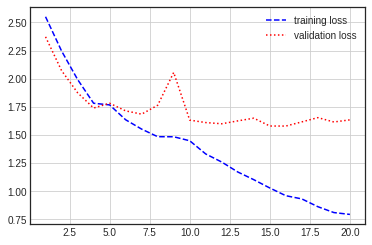

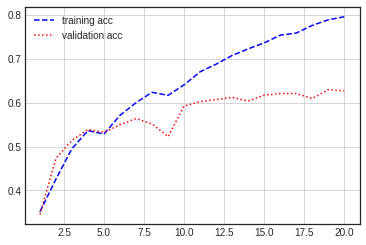

In [39]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b--', label='training loss')
plt.plot(epochs, val_loss, 'r:', label='validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label='training acc')
plt.plot(epochs, val_acc, 'r:', label='validation acc')
plt.grid()
plt.legend()
plt.show()

### 모델 평가


In [40]:
model.evaluate(pad_x_test, y_test)

71/71 [==============================] - 1s 16ms/step - loss: 1.7427 - acc: 0.6024


[1.7426646947860718, 0.6024042963981628]

## IMDB 데이터셋 with LSTM

### 데이터 로드

In [41]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [53]:
num_words = 10000
max_len = 500
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

print(len(x_train))
print(len(x_test))

pad_x_train = sequence.pad_sequences(x_train, maxlen=max_len)
pad_x_test = sequence.pad_sequences(x_test, maxlen=max_len)

print(pad_x_train.shape)
print(pad_x_test.shape)

25000
25000
(25000, 500)
(25000, 500)


### 모델 구성

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding

In [55]:
model = Sequential()

model.add(Embedding(num_words, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, None, 32)          320000    
                                                                 
 lstm_8 (LSTM)               (None, 32)                8320      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


### 모델 학습

In [56]:
histroy = model.fit(pad_x_train, y_train, epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 5s 24ms/step - loss: 0.5549 - acc: 0.7380 - val_loss: 0.3834 - val_acc: 0.8500
Epoch 2/10
157/157 [==============================] - 3s 22ms/step - loss: 0.3277 - acc: 0.8720 - val_loss: 0.3389 - val_acc: 0.8586
Epoch 3/10
157/157 [==============================] - 3s 21ms/step - loss: 0.2496 - acc: 0.9054 - val_loss: 0.3276 - val_acc: 0.8748
Epoch 4/10
157/157 [==============================] - 3s 20ms/step - loss: 0.2072 - acc: 0.9224 - val_loss: 0.3093 - val_acc: 0.8742
Epoch 5/10
157/157 [==============================] - 3s 20ms/step - loss: 0.1832 - acc: 0.9323 - val_loss: 0.3129 - val_acc: 0.8812
Epoch 6/10
157/157 [==============================] - 3s 21ms/step - loss: 0.1639 - acc: 0.9415 - val_loss: 0.3341 - val_acc: 0.8864
Epoch 7/10
157/157 [==============================] - 3s 20ms/step - loss: 0.1503 - acc: 0.9470 - val_loss: 0.3362 - val_acc: 0.8540
Epoch 8/10
157/157 [==============================] - 3s 22ms/step - 

### 시각화

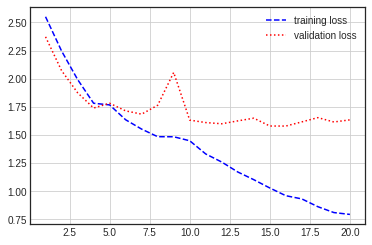

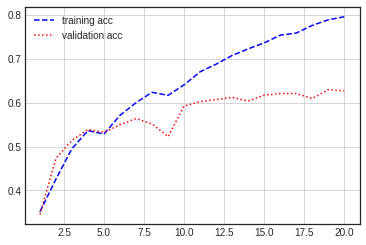

In [57]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b--', label='training loss')
plt.plot(epochs, val_loss, 'r:', label='validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label='training acc')
plt.plot(epochs, val_acc, 'r:', label='validation acc')
plt.grid()
plt.legend()
plt.show()

### 모델 평가

In [59]:
model.evaluate(pad_x_test, y_test)

782/782 [==============================] - 7s 9ms/step - loss: 0.4443 - acc: 0.8638


[0.4442676901817322, 0.8637599945068359]

# Cosine 함수를 이용한 순환 신경망

In [60]:
import numpy as np

In [61]:
np.random.seed(111)

time = np.arange(30*12+1)
month_time = (time % 30) / 30
time_series = 20 * np.where(month_time < 0.5,
                            np.cos(2 * np.pi * month_time),
                            np.cos(2 * np.pi * month_time) + np.random.random(361))

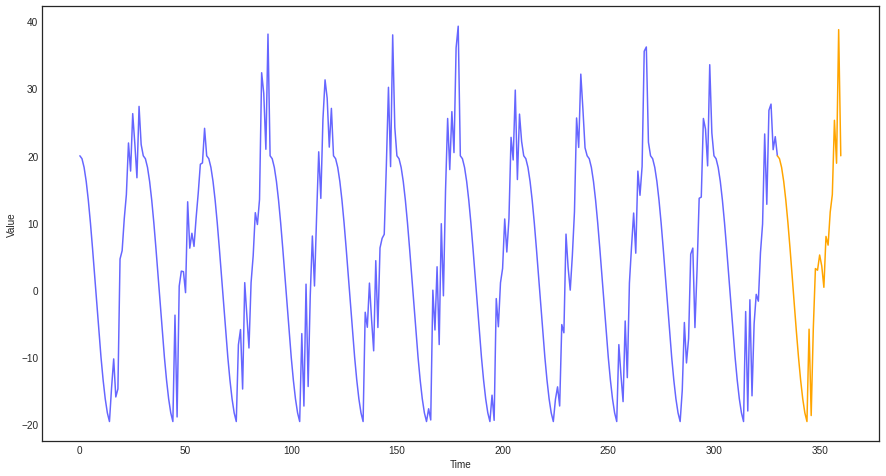

In [63]:
plt.figure(figsize=(15, 8))
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(np.arange(0, 30*11+1),
         time_series[:30*11+1],
         color='blue', alpha=0.6, label='Train Data')
plt.plot(np.arange(30*11, 30*12+1),
         time_series[30*11:],
         color='orange', label='Test Data')
plt.show()

### 데이터 전처리

In [64]:
def make_data(time_series, n):
  x_train_full, y_train_full = list(), list()

  for i in range(len(time_series)):
    x = time_series[i:(i+n)]
    if (i+n) < len(time_series):
      x_train_full.append(x)
      y_train_full.append(time_series[i+n])
    else:
      break

  x_train_full, y_train_full = np.array(x_train_full), np.array(y_train_full)

  return x_train_full, y_train_full

In [65]:
n = 10
x_train_full, y_train_full = make_data(time_series, n)

In [67]:
print(x_train_full.shape)
print(y_train_full.shape)

(351, 10)
(351,)


In [68]:
x_train_full = x_train_full.reshape(-1, n, 1)
y_train_full = y_train_full.reshape(-1, 1)

In [69]:
print(x_train_full.shape)
print(y_train_full.shape)

(351, 10, 1)
(351, 1)


## 테스트 데이터셋 생성

In [70]:
x_train = x_train_full[:30*11]
y_train = y_train_full[:30*11]

x_test = x_train_full[30*11:]
y_test = y_train_full[30*11:]

In [71]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(330, 10, 1) (330, 1)
(21, 10, 1) (21, 1)


## 데이터 확인

In [72]:
sample_series = np.arange(100)
a, b = make_data(sample_series, 10)

print(a[0])
print(b[0])

[0 1 2 3 4 5 6 7 8 9]
10


## 모델 구성

In [73]:
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense
from tensorflow.keras.models import Sequential

In [75]:
def build_model(n):
  model = Sequential()

  model.add(SimpleRNN(units=32, activation='tanh', input_shape=(n,1)))
  model.add(Dense(1))

  model.compile(optimizer='adam',
                loss='mse')
  return model

In [76]:
model = build_model(10)
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_7 (SimpleRNN)    (None, 32)                1088      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


## 모델 학습

In [77]:
model.fit(x_train, y_train, epochs=100,
          batch_size=12)

Epoch 1/100
28/28 [==============================] - 1s 10ms/step - loss: 179.9716
Epoch 2/100
28/28 [==============================] - 0s 8ms/step - loss: 148.1337
Epoch 3/100
28/28 [==============================] - 0s 8ms/step - loss: 127.3522
Epoch 4/100
28/28 [==============================] - 0s 8ms/step - loss: 113.7545
Epoch 5/100
28/28 [==============================] - 0s 8ms/step - loss: 103.8532
Epoch 6/100
28/28 [==============================] - 0s 8ms/step - loss: 95.3018
Epoch 7/100
28/28 [==============================] - 0s 8ms/step - loss: 88.2495
Epoch 8/100
28/28 [==============================] - 0s 8ms/step - loss: 82.1714
Epoch 9/100
28/28 [==============================] - 0s 8ms/step - loss: 76.6978
Epoch 10/100
28/28 [==============================] - 0s 9ms/step - loss: 71.9715
Epoch 11/100
28/28 [==============================] - 0s 7ms/step - loss: 67.7918
Epoch 12/100
28/28 [==============================] - 0s 9ms/step - loss: 64.0638
Epoch 13/100
28/28 

## 예측값 그려보기

1/1 [==============================] - 0s 18ms/step


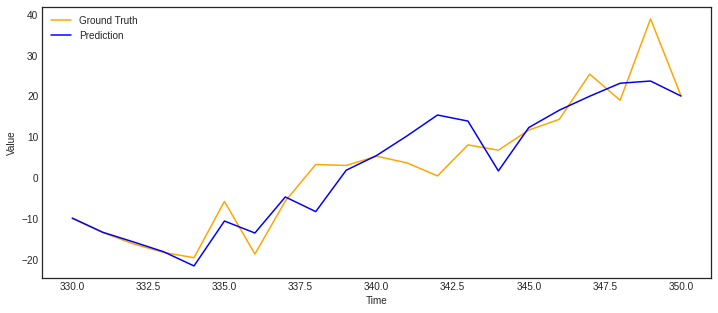

In [89]:
prediction = model.predict(x_test)
pred_range = np.arange(len(y_train), len(y_train) + len(prediction))

plt.figure(figsize=(12, 5))
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(pred_range, y_test.flatten(), color='orange', label='Ground Truth')
plt.plot(pred_range, prediction.flatten(), color='blue', label='Prediction')
plt.legend()
plt.show()

## 모델 재구성 (2)
- LSTM 사용

In [79]:
from tensorflow.keras.layers import LSTM

In [95]:
def build_model2(n):
  model = Sequential()

  model.add(LSTM(units=32, return_sequences=True, input_shape=(n,1)))
  model.add(LSTM(32))
  model.add(Dense(1))

  model.compile(optimizer='adam',
                loss='mse')
  return model

In [96]:
model2 = build_model2(10)
model2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 10, 32)            4352      
                                                                 
 lstm_11 (LSTM)              (None, 32)                8320      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12,705
Trainable params: 12,705
Non-trainable params: 0
_________________________________________________________________


## 모델 재학습 및 예측값 그려보기

In [97]:
model2.fit(x_train, y_train, epochs=100, batch_size=12)

Epoch 1/100
28/28 [==============================] - 3s 5ms/step - loss: 231.3226
Epoch 2/100
28/28 [==============================] - 0s 5ms/step - loss: 188.5397
Epoch 3/100
28/28 [==============================] - 0s 5ms/step - loss: 141.6222
Epoch 4/100
28/28 [==============================] - 0s 5ms/step - loss: 109.0974
Epoch 5/100
28/28 [==============================] - 0s 5ms/step - loss: 89.2997
Epoch 6/100
28/28 [==============================] - 0s 5ms/step - loss: 74.3666
Epoch 7/100
28/28 [==============================] - 0s 5ms/step - loss: 64.0238
Epoch 8/100
28/28 [==============================] - 0s 5ms/step - loss: 55.6756
Epoch 9/100
28/28 [==============================] - 0s 5ms/step - loss: 49.2694
Epoch 10/100
28/28 [==============================] - 0s 5ms/step - loss: 44.4444
Epoch 11/100
28/28 [==============================] - 0s 5ms/step - loss: 40.7216
Epoch 12/100
28/28 [==============================] - 0s 5ms/step - loss: 37.9449
Epoch 13/100
28/28 [=

1/1 [==============================] - 1s 1s/step


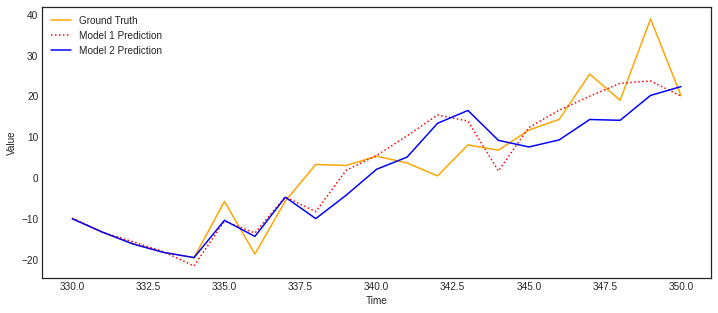

In [98]:
prediction2 = model2.predict(x_test)
pred_range = np.arange(len(y_train), len(y_train) + len(prediction2))

plt.figure(figsize=(12, 5))
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(pred_range, y_test.flatten(), color='orange', label='Ground Truth')
plt.plot(pred_range, prediction.flatten(), 'r:', label='Model 1 Prediction')
plt.plot(pred_range, prediction2.flatten(), color='blue', label='Model 2 Prediction')
plt.legend()
plt.show()

## 모델 재구성(3)
- GRU 사용
  - LSTM 보다 더 쉬운 구조

In [92]:
from tensorflow.keras.layers import GRU

In [101]:
def build_model3(n):
  model = Sequential()

  model.add(GRU(units=30, return_sequences=True, input_shape=(n,1)))
  model.add(GRU(30))
  model.add(Dense(1))

  model.compile(optimizer='adam',
                loss='mse')
  return model

model3 = build_model3(10)
model3.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 10, 30)            2970      
                                                                 
 gru_1 (GRU)                 (None, 30)                5580      
                                                                 
 dense_10 (Dense)            (None, 1)                 31        
                                                                 
Total params: 8,581
Trainable params: 8,581
Non-trainable params: 0
_________________________________________________________________


## 모델 재학습 및 예측값 그려보기

In [102]:
model3.fit(x_train, y_train, epochs=100, batch_size=12)

Epoch 1/100
28/28 [==============================] - 3s 5ms/step - loss: 222.4988
Epoch 2/100
28/28 [==============================] - 0s 5ms/step - loss: 161.9207
Epoch 3/100
28/28 [==============================] - 0s 6ms/step - loss: 126.6559
Epoch 4/100
28/28 [==============================] - 0s 6ms/step - loss: 101.7572
Epoch 5/100
28/28 [==============================] - 0s 5ms/step - loss: 85.6851
Epoch 6/100
28/28 [==============================] - 0s 5ms/step - loss: 75.3600
Epoch 7/100
28/28 [==============================] - 0s 5ms/step - loss: 68.2190
Epoch 8/100
28/28 [==============================] - 0s 5ms/step - loss: 62.8024
Epoch 9/100
28/28 [==============================] - 0s 5ms/step - loss: 58.2617
Epoch 10/100
28/28 [==============================] - 0s 5ms/step - loss: 54.3091
Epoch 11/100
28/28 [==============================] - 0s 5ms/step - loss: 50.7417
Epoch 12/100
28/28 [==============================] - 0s 5ms/step - loss: 47.1826
Epoch 13/100
28/28 [=

1/1 [==============================] - 1s 543ms/step


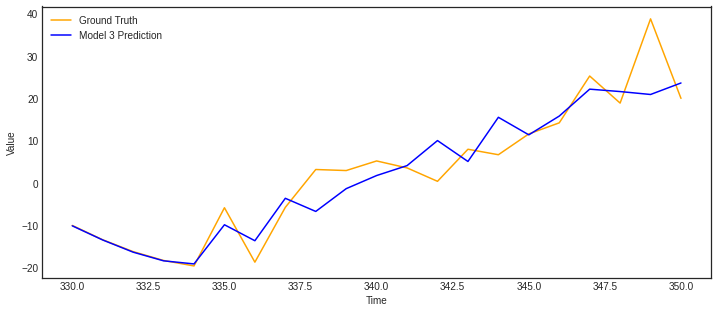

In [103]:
prediction3 = model3.predict(x_test)
pred_range = np.arange(len(y_train), len(y_train) + len(prediction3))

plt.figure(figsize=(12, 5))
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(pred_range, y_test.flatten(), color='orange', label='Ground Truth')
plt.plot(pred_range, prediction3.flatten(), color='blue', label='Model 3 Prediction')
plt.legend()
plt.show()

# Conv1D 

- 텍스트 분류나 시계열 예측 같은 간단한 문제, 오디오 생성, 기계 번역 등의 문제에서 좋은 성능

- 타임스텝의 순서에 민감하지 X


- 2D Convolution
  - 지역적 특징을 인식

  <img src="https://missinglink.ai/wp-content/uploads/2019/03/2D-convolutional-example_2x-700x584.png" width="500">

- 1D Convolution
  - 문맥을 인식

  <img src="https://missinglink.ai/wp-content/uploads/2019/03/1D-convolutional-example_2x.png" width="500">

  <sub>출처: https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/</sub>

## Conv1D Layer
- 입력: `(batch_size, timesteps, channels)`

- 출력: `(batch_size, timesteps, filters)`

- 필터의 사이즈가 커져도 모델이 급격히 증가하지 않기 때문에 다양한 크기를 사용할 수 있음
- 데이터의 품질이 좋으면 굳이 크기를 달리하여 여러 개를 사용하지 않아도 될 수도 있음

## MaxPooling1D Layer
- 다운 샘플링 효과

- 단지 1차원형태로 바뀐 것 뿐

## GlovalMaxPooling Layer
- 배치차원을 제외하고 2차원 형태를 1차원 형태로 바꾸어주는 레이어

- Flatten layer로 대신 사용가능

## IMDB 데이터셋

### 데이터 로드 및 전처리

In [104]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPool1D, GlobalAveragePooling1D

In [106]:
num_words = 10000
max_len = 500
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

print(len(x_train))
print(len(x_test))

pad_x_train = pad_sequences(x_train, maxlen=max_len)
pad_x_test = pad_sequences(x_test, maxlen=max_len)

print(pad_x_train.shape)
print(pad_x_test.shape)

25000
25000
(25000, 500)
(25000, 500)


### 모델 구성

In [115]:
def build_model():
  model = Sequential()

  model.add(Embedding(input_dim=num_words, output_dim=32,
                      input_length=max_len))
  model.add(Conv1D(32, 7, activation='relu'))
  model.add(MaxPool1D(7))
  model.add(Conv1D(32, 5, activation='relu'))
  model.add(MaxPool1D(5))
  model.add(GlobalAveragePooling1D())
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer=RMSprop(learning_rate=1e-4),
                loss='binary_crossentropy', metrics=['acc'])
  
  return model

In [116]:
model = build_model()
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 500, 32)           320000    
                                                                 
 conv1d_2 (Conv1D)           (None, 494, 32)           7200      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 70, 32)           0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 66, 32)            5152      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 13, 32)           0         
 1D)                                                             
                                                                 
 global_average_pooling1d_1   (None, 32)             

### 모델 학습

In [117]:
history = model.fit(pad_x_train, y_train, batch_size=128,  
                    epochs=30, validation_split=0.2)

Epoch 1/30
157/157 [==============================] - 2s 9ms/step - loss: 0.6929 - acc: 0.5073 - val_loss: 0.6925 - val_acc: 0.5770
Epoch 2/30
157/157 [==============================] - 1s 7ms/step - loss: 0.6916 - acc: 0.5744 - val_loss: 0.6907 - val_acc: 0.5850
Epoch 3/30
157/157 [==============================] - 1s 7ms/step - loss: 0.6878 - acc: 0.6464 - val_loss: 0.6839 - val_acc: 0.7076
Epoch 4/30
157/157 [==============================] - 1s 7ms/step - loss: 0.6759 - acc: 0.7086 - val_loss: 0.6652 - val_acc: 0.7226
Epoch 5/30
157/157 [==============================] - 1s 7ms/step - loss: 0.6495 - acc: 0.7544 - val_loss: 0.6285 - val_acc: 0.7618
Epoch 6/30
157/157 [==============================] - 1s 7ms/step - loss: 0.6029 - acc: 0.7829 - val_loss: 0.5739 - val_acc: 0.7968
Epoch 7/30
157/157 [==============================] - 1s 7ms/step - loss: 0.5392 - acc: 0.8141 - val_loss: 0.5090 - val_acc: 0.8208
Epoch 8/30
157/157 [==============================] - 1s 7ms/step - loss: 0.

### 시각화

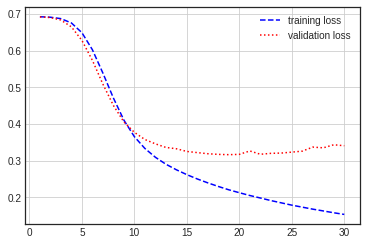

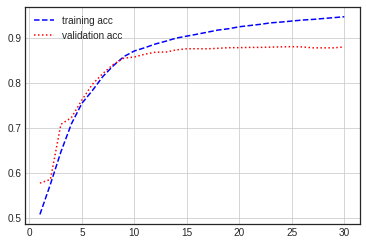

In [118]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b--', label='training loss')
plt.plot(epochs, val_loss, 'r:', label='validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label='training acc')
plt.plot(epochs, val_acc, 'r:', label='validation acc')
plt.grid()
plt.legend()
plt.show()

- 과적합이 일어났지만, 다른 옵티마이저 사용, 규제화를 걸어보는 등 다양하게 시도해볼 수 있음